# Code File for Calculations and Plots Used In the Economic Analysis



In [1]:
# Import Libraries

import numpy as np
import matplotlib.pyplot as plt

# Calculations of Relevant Economic Metrics

Calculations are done based on the current macroeconomic context of Ghana in March 2025. 
Exchange rates at the time of budgeting: NOK 1: GHC 1.48.

In [9]:
# Define the parameters for the Discounted Payback Period (DPP) and Levelized Cost of Cooling (LCOC)
# These parameters are based on the provided financial analysis and assumptions.

# Financial parameters
# Note: All monetary values are in GHC (Ghanaian Cedi) and energy values in kWh.
investment_cost = 219750  # GHC
om_cost_first_year = 47600 # GHC
annual_om_cost = 6000     # GHC/year
annual_cooling_energy = 791 + 15.16  # kWh/year
project_lifetime = 20  # years
annual_savings = 23500 - annual_om_cost  # GHC/year (post-harvest + arbitrage)
r = 0.28    # Discount rate (28%, March 2025)
i = 0.224      # Inflation rate (22.4%, March 2025)
# Note: The annual savings is calculated as the difference between the total annual savings and the annual O&M cost.
# The annual savings is the net benefit after accounting for the O&M costs.

# Calculate the Discounted Payback Period (DPP) and Levelized Cost of Cooling (LCOC)
# Discounted Payback Period (DPP) formula:
numerator = np.log(((investment_cost+om_cost_first_year) / annual_savings) * (i - r) + 1)
denominator = np.log((1 + i) / (1 + r))
DPP = numerator / denominator

# Levelized Cost of Cooling (LCOC) formula: 
# Net Present Value (NPV) of costs and cooling energy over T years
discounted_annual_costs = sum([annual_om_cost / (1 + r)**t for t in range(1, project_lifetime+1)])
discounted_cooling_energy = sum([annual_cooling_energy / (1 + r)**t for t in range(1, project_lifetime+1)])
LCOC = (investment_cost + om_cost_first_year + discounted_annual_costs) / discounted_cooling_energy

print(DPP, LCOC)

43.245233819905884 100.97122285303831


# Relevant Code Used In the Sensitivity Analysis for LCOC and DPP

All formulas used in calculations can be found in the master's thesis section 5.

C:\Users\lulla\AppData\Local\Temp\ipykernel_26756\396084824.py:21: RuntimeWarning: invalid value encountered in scalar divide
  dpp = np.log(numerator) / np.log((1 + i_rate) / (1 + r))


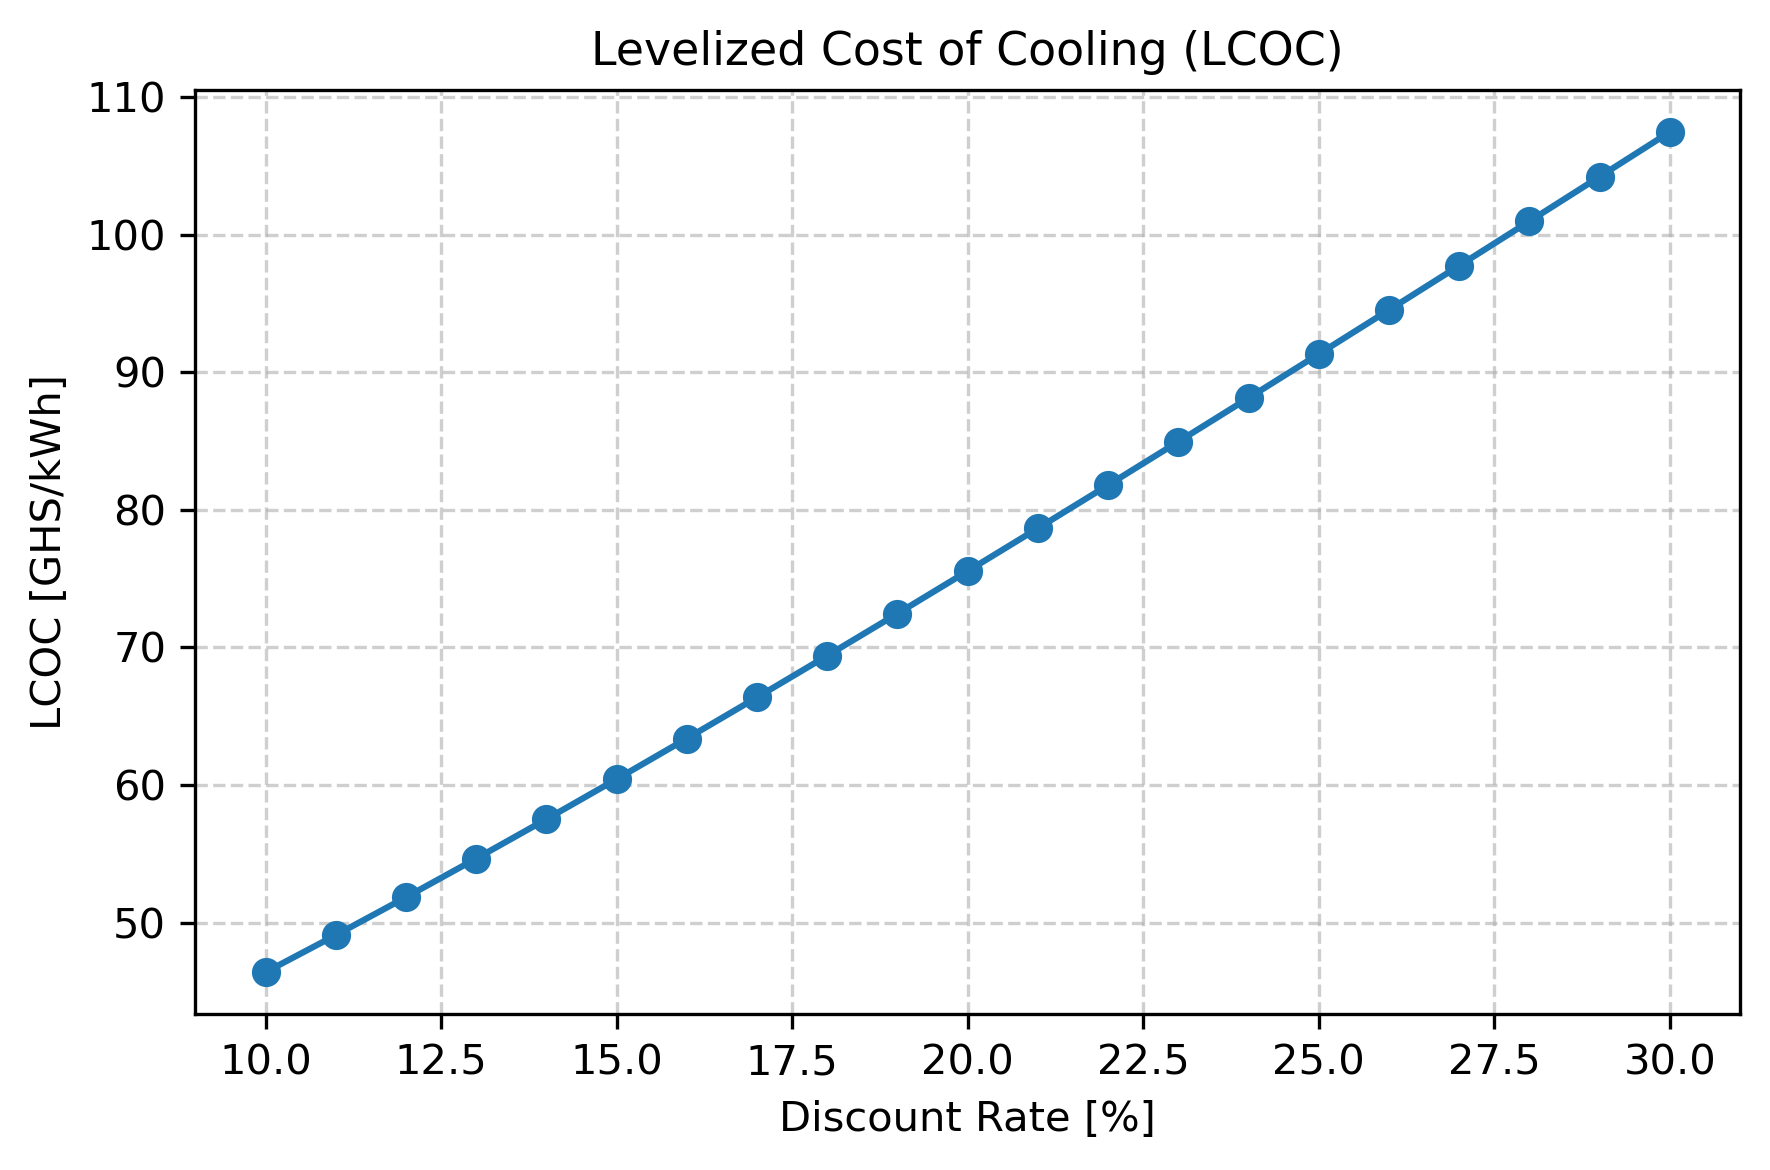

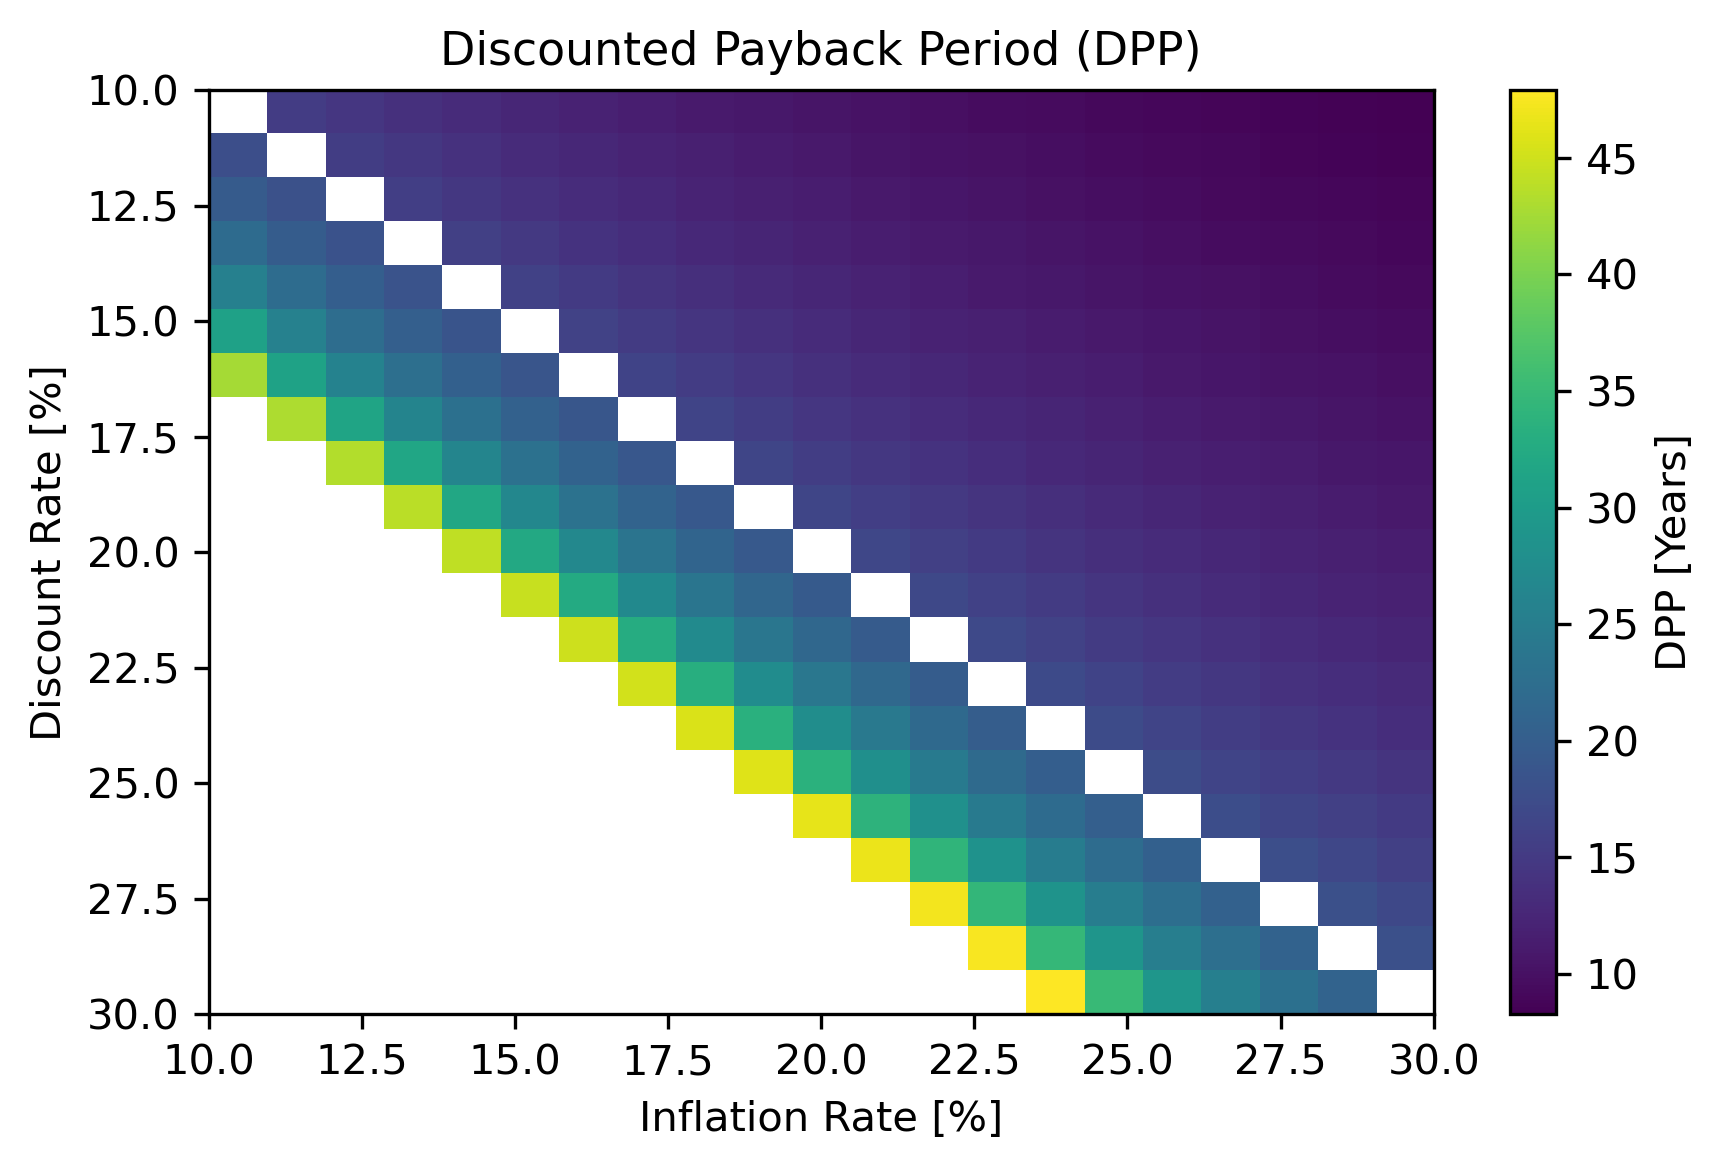

In [3]:
# Sensitivity Analysis for DPP and LCOC

# Sensitivity analysis for LCOC: varying discount rates.
discount_rates = np.linspace(0.10, 0.30, 21)
lcoc_values = []

for r in discount_rates:
    discounted_costs = sum([annual_om_cost / (1 + r) ** t for t in range(1, project_lifetime + 1)])
    discounted_energy = sum([annual_cooling_energy / (1 + r) ** t for t in range(1, project_lifetime + 1)])
    lcoc = ((investment_cost+om_cost_first_year + discounted_costs)) / discounted_energy
    lcoc_values.append(lcoc)

# Sensitivity analysis for DPP: varying both discount and inflation rates.
inflation_rates = np.linspace(0.10, 0.30, 21)
dpp_matrix = np.zeros((len(discount_rates), len(inflation_rates)))

for i, r in enumerate(discount_rates):
    for j, i_rate in enumerate(inflation_rates):
        numerator = ((investment_cost+om_cost_first_year-annual_om_cost) / annual_savings) * (i_rate - r) + 1
        if numerator > 0:
            dpp = np.log(numerator) / np.log((1 + i_rate) / (1 + r))
            dpp_matrix[i, j] = dpp
        else:
            dpp_matrix[i, j] = np.nan  # mark invalid results

# Plotting

# Plotting LCOC vs Discount Rate
fig, ax1 = plt.subplots(figsize=(6, 4), dpi=300)
ax1.plot([r * 100 for r in discount_rates], lcoc_values, marker='o', color='tab:blue', linewidth=1.5)

ax1.set_title("Levelized Cost of Cooling (LCOC)", fontsize=11)
ax1.set_xlabel("Discount Rate [%]", fontsize=10)
ax1.set_ylabel("LCOC [GHS/kWh]", fontsize=10)
ax1.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig("lcoc_vs_discount_rate.png", bbox_inches='tight')
plt.show()

# Plotting DPP Sensitivity Heatmap
fig, ax2 = plt.subplots(figsize=(6, 4), dpi=300)
c = ax2.imshow(dpp_matrix, extent=[10, 30, 30, 10], aspect='auto', cmap='viridis')

fig.colorbar(c, ax=ax2, label='DPP [Years]')
ax2.set_title("Discounted Payback Period (DPP)", fontsize=11)
ax2.set_xlabel("Inflation Rate [%]", fontsize=10)
ax2.set_ylabel("Discount Rate [%]", fontsize=10)
ax2.grid(False)

plt.tight_layout()
plt.savefig("dpp_sensitivity_heatmap.png", bbox_inches='tight')
plt.show()